In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
'''
import zstandard as zstd

def count_lines_zst(filepath):
    dctx = zstd.ZstdDecompressor()
    line_count = 0
    
    with open(filepath, 'rb') as f:
        with dctx.stream_reader(f) as reader:
            text_stream = reader.read(1024 * 1024)  # Read 1MB chunks
            while text_stream:
                line_count += text_stream.count(b'\n')
                text_stream = reader.read(1024 * 1024)
    
    return line_count

# Count lines
num_lines = count_lines_zst('../RawData/_raw_yt_metadata.jsonl.zst')
print(f"Number of lines: {num_lines}")
'''

'\nimport zstandard as zstd\n\ndef count_lines_zst(filepath):\n    dctx = zstd.ZstdDecompressor()\n    line_count = 0\n\n    with open(filepath, \'rb\') as f:\n        with dctx.stream_reader(f) as reader:\n            text_stream = reader.read(1024 * 1024)  # Read 1MB chunks\n            while text_stream:\n                line_count += text_stream.count(b\'\n\')\n                text_stream = reader.read(1024 * 1024)\n\n    return line_count\n\n# Count lines\nnum_lines = count_lines_zst(\'../RawData/_raw_yt_metadata.jsonl.zst\')\nprint(f"Number of lines: {num_lines}")\n'

In [8]:
'''
df_test = pd.read_csv('../RawData/num_comments.tsv.gz', sep='\t', compression='gzip')
df_test.shape
'''

"\ndf_test = pd.read_csv('../RawData/num_comments.tsv.gz', sep='\t', compression='gzip')\ndf_test.shape\n"

In [61]:
# Random sample
df_random = pd.read_csv('../SampleData/random_sample_raw_yt_metadata.csv.gz', compression='gzip')
print(df_random.shape)
df_random.head()

(12711, 12)


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,Music,UCzzzUN8yvD2LRAnY-lhzyLQ,2019-11-07 23:22:24.361642,Halsey - Without Me🔥\n\n🔔 Subscribe and turn o...,10275.0,qdhAynMVZnY,204,420486.0,"Halsey - Without Me (Lyrics),Halsey - Without ...",Halsey - Without Me (Lyrics),2018-10-04 00:00:00,59351488
1,Comedy,UCzzbaQY1nPim5yroAjtXRTw,2019-11-14 19:55:54.250779,my dad + james churros enjoy\n\nmy last video ...,3149.0,bvQCVlmuyn4,458,189160.0,"twaimz,issa,james charles,my dad,my dad confro...",MY DAD CONFRONTS JAMES CHARLES,2019-08-27 00:00:00,1814171
2,Music,UCzzXsnHsEmGorQ6xAKL2sZA,2019-11-11 13:14:18.293945,The ORION Tour is coming to your city: https:/...,22153.0,8j741TUIET0,194,1008568.0,"Ambassadors,Renegades,KIDinaKORNER/Interscope,...",X Ambassadors - Renegades (Lyric Video),2015-04-28 00:00:00,192366293
3,Music,UCzyMypIMUep5W0J3R3PC87Q,2019-11-02 08:11:11.969410,Provided to YouTube by Atlantic Records\n\nDou...,8725.0,GDGPEEy3SYk,361,107106.0,"Nipsey Hussle,Belly,Dom Kennedy,Victory Lap,Do...",Double Up (feat. Belly and Dom Kennedy),2018-02-15 00:00:00,12589295
4,Entertainment,UCzwFZOhCfCZTgLruMz_RWCw,2019-10-30 12:50:15.322764,Bowser Junior has another sleepover!\nhttp://...,5246.0,x8-BFZUOzIM,705,127010.0,"supermariologan,sml,movie,bowser junior,sleepo...",SML Movie: Bowser Junior's Crazy Sleepover!,2019-07-30 00:00:00,7740966


In [62]:
df_random['upload_date'] = pd.to_datetime(df_random['upload_date'], format='mixed', errors='coerce')
df_random['crawl_date'] = pd.to_datetime(df_random['crawl_date'], format='mixed', errors='coerce')
df_random['days_since_upload'] = (df_random['crawl_date'] - df_random['upload_date']).dt.total_seconds() / 86400
df_random['views_per_day'] = df_random['view_count'] / df_random['days_since_upload']
#df_random['views_per_day'].isna().sum()
#df_random[df_random['views_per_day'] == 0]

# Check the distribution statistics
print(df_random['views_per_day'].describe())
print(f"\nMax value: {df_random['views_per_day'].max()}")
print(f"99th percentile: {df_random['views_per_day'].quantile(0.99)}")

count    1.271100e+04
mean     3.493331e+04
std      8.935880e+04
min      1.000011e+04
25%      1.271805e+04
50%      1.765058e+04
75%      3.032516e+04
max      4.327986e+06
Name: views_per_day, dtype: float64

Max value: 4327986.489257766
99th percentile: 289567.2331072731


In [63]:
df_random

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,days_since_upload,views_per_day
0,Music,UCzzzUN8yvD2LRAnY-lhzyLQ,2019-11-07 23:22:24.361642,Halsey - Without Me🔥\n\n🔔 Subscribe and turn o...,10275.0,qdhAynMVZnY,204,420486.0,"Halsey - Without Me (Lyrics),Halsey - Without ...",Halsey - Without Me (Lyrics),2018-10-04,59351488,399.973893,148388.404913
1,Comedy,UCzzbaQY1nPim5yroAjtXRTw,2019-11-14 19:55:54.250779,my dad + james churros enjoy\n\nmy last video ...,3149.0,bvQCVlmuyn4,458,189160.0,"twaimz,issa,james charles,my dad,my dad confro...",MY DAD CONFRONTS JAMES CHARLES,2019-08-27,1814171,79.830489,22725.289829
2,Music,UCzzXsnHsEmGorQ6xAKL2sZA,2019-11-11 13:14:18.293945,The ORION Tour is coming to your city: https:/...,22153.0,8j741TUIET0,194,1008568.0,"Ambassadors,Renegades,KIDinaKORNER/Interscope,...",X Ambassadors - Renegades (Lyric Video),2015-04-28,192366293,1658.551601,115984.508970
3,Music,UCzyMypIMUep5W0J3R3PC87Q,2019-11-02 08:11:11.969410,Provided to YouTube by Atlantic Records\n\nDou...,8725.0,GDGPEEy3SYk,361,107106.0,"Nipsey Hussle,Belly,Dom Kennedy,Victory Lap,Do...",Double Up (feat. Belly and Dom Kennedy),2018-02-15,12589295,625.341111,20131.884476
4,Entertainment,UCzwFZOhCfCZTgLruMz_RWCw,2019-10-30 12:50:15.322764,Bowser Junior has another sleepover!\nhttp://...,5246.0,x8-BFZUOzIM,705,127010.0,"supermariologan,sml,movie,bowser junior,sleepo...",SML Movie: Bowser Junior's Crazy Sleepover!,2019-07-30,7740966,92.534900,83654.556671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12706,Music,UC-0Urs9tifl-7DDE1RLbBHQ,2019-11-11 03:23:59.728187,SPOTIFY;\nhttps://open.spotify.com/track/7Cq27...,41807.0,OC7cNS0GINo,194,1478057.0,"scar,lxrd,scarlxrd,scar lord,heart attack,hear...",scarlxrd - HEART ATTACK [Prod. JVCXB],2017-06-23,68746173,871.141664,78915.032857
12707,Film & Animation,UC-0Dm-O7TfHMBRsh1zplMEg,2019-11-17 17:03:41.371188,Gran Hotel is a Spanish drama television serie...,197.0,W7k_FjUMESc,853,4444.0,NaN,Alicia & Julio Grand Hotel Part 1🥰,2019-09-05,782544,73.710895,10616.395238
12708,Entertainment,UC-0D1RlSzcvBoODCKSoLl2g,2019-11-13 20:53:24.394149,My INSTAGRAM : https://www.instagram.com/emily...,2332.0,jqE42KlFG2M,178,5026.0,"kids,emily tube,playing,emily video,pretend pl...",Playing with Baby Dolls and BINGO Dog,2019-09-01,2187275,73.870421,29609.618622
12709,Entertainment,UC-0D1RlSzcvBoODCKSoLl2g,2019-11-13 20:53:57.871281,More videos here: https://www.youtube.com/play...,33056.0,ZXAxsLgWh70,191,65925.0,"kids,baby,toys,little,doll,playing,Oyuncak beb...",Emily Catching Cute baby dolls,2018-10-16,29330179,393.870809,74466.495999


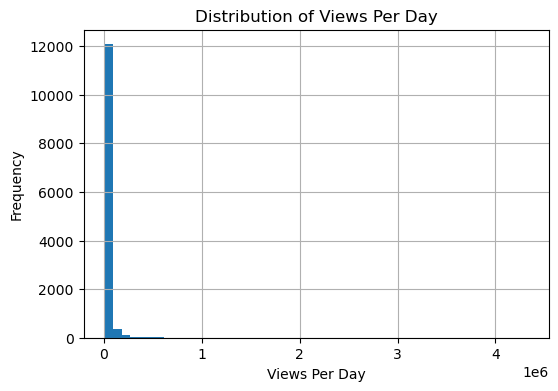

In [67]:
df_random['views_per_day'].hist(bins=50, figsize=(6,4))
plt.xlabel('Views Per Day')
plt.ylabel('Frequency')
plt.title('Distribution of Views Per Day')
plt.show()

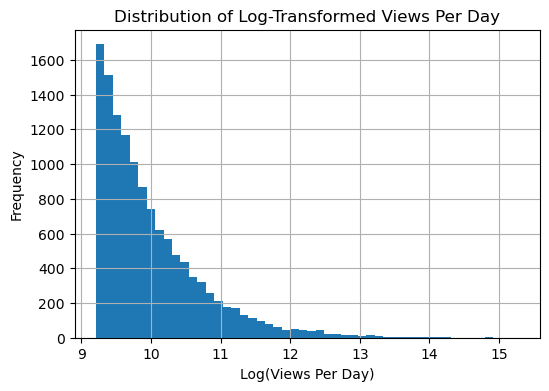

In [65]:
np.log1p(df_random['views_per_day']).hist(bins=50, figsize=(6,4))
plt.xlabel('Log(Views Per Day)')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Views Per Day')
plt.show()

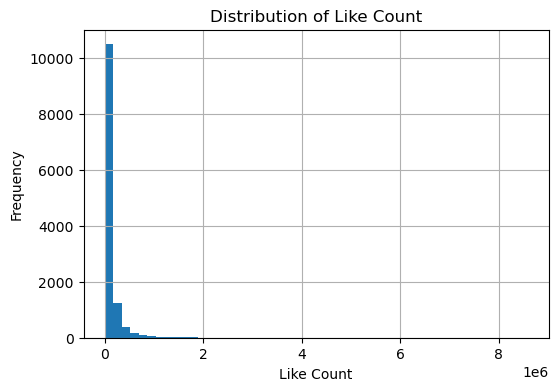

In [68]:
#np.log1p(df_random['view_count']).hist(bins=50, figsize=(6,4))
df_random['like_count'].hist(bins=50, figsize=(6,4))
plt.xlabel('Like Count')
plt.ylabel('Frequency')
plt.title('Distribution of Like Count')
plt.show()

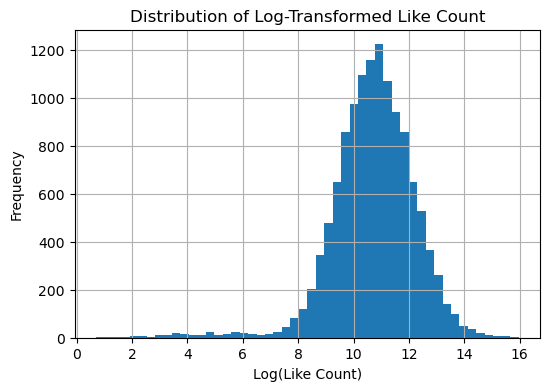

In [69]:
np.log1p(df_random['like_count']).hist(bins=50, figsize=(6,4))
plt.xlabel('Log(Like Count)')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Like Count')
plt.show()

In [49]:
df_random.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46704 entries, 0 to 46703
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   categories         46703 non-null  object        
 1   channel_id         46704 non-null  object        
 2   crawl_date         46704 non-null  datetime64[ns]
 3   description        46012 non-null  object        
 4   dislike_count      46101 non-null  float64       
 5   display_id         46704 non-null  object        
 6   duration           46704 non-null  int64         
 7   like_count         46101 non-null  float64       
 8   tags               44218 non-null  object        
 9   title              46704 non-null  object        
 10  upload_date        46704 non-null  datetime64[ns]
 11  view_count         46704 non-null  int64         
 12  days_since_upload  46704 non-null  float64       
 13  views_per_day      46704 non-null  float64       
dtypes: dat

In [32]:
df_random[df_random['tags'].isna()].shape

(91945, 12)

In [82]:
# Stratified sample
df_prepared = pd.read_csv('../SampleData/prepared_data.csv.gz', compression='gzip')
print(df_prepared.shape)
df_prepared.head()

(12711, 24)


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,...,join_date,channel_x,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,channel_y,channel_views,avg_views_per_video,avg_subs_per_video
0,Music,UCzzzUN8yvD2LRAnY-lhzyLQ,2019-11-07 23:22:24.361642,Halsey - Without Me🔥\n\n🔔 Subscribe and turn o...,10275.0,qdhAynMVZnY,204,420486.0,"Halsey - Without Me (Lyrics),Halsey - Without ...",Halsey - Without Me (Lyrics),...,2016-06-04,UCzzzUN8yvD2LRAnY-lhzyLQ,DropNight,132000.0,292.0,101524.0,UCzzzUN8yvD2LRAnY-lhzyLQ,68841735.0,2.357594e+05,452.054795
1,Comedy,UCzzbaQY1nPim5yroAjtXRTw,2019-11-14 19:55:54.250779,my dad + james churros enjoy\n\nmy last video ...,3149.0,bvQCVlmuyn4,458,189160.0,"twaimz,issa,james charles,my dad,my dad confro...",MY DAD CONFRONTS JAMES CHARLES,...,2013-08-06,UCzzbaQY1nPim5yroAjtXRTw,twaimz,4175052.0,81.0,2234.0,UCzzbaQY1nPim5yroAjtXRTw,319312350.0,3.942128e+06,51543.851852
2,Music,UCzzXsnHsEmGorQ6xAKL2sZA,2019-11-11 13:14:18.293945,The ORION Tour is coming to your city: https:/...,22153.0,8j741TUIET0,194,1008568.0,"Ambassadors,Renegades,KIDinaKORNER/Interscope,...",X Ambassadors - Renegades (Lyric Video),...,2013-05-06,UCzzXsnHsEmGorQ6xAKL2sZA,XAmbassadorsVEVO,663000.0,77.0,27216.0,UCzzXsnHsEmGorQ6xAKL2sZA,535489019.0,6.954403e+06,8610.389610
3,Music,UCzyMypIMUep5W0J3R3PC87Q,2019-11-02 08:11:11.969410,Provided to YouTube by Atlantic Records\n\nDou...,8725.0,GDGPEEy3SYk,361,107106.0,"Nipsey Hussle,Belly,Dom Kennedy,Victory Lap,Do...",Double Up (feat. Belly and Dom Kennedy),...,2013-06-15,UCzyMypIMUep5W0J3R3PC87Q,Nipsey Hussle - Topi...,30953.0,349.0,418494.0,UCzyMypIMUep5W0J3R3PC87Q,100817594.0,2.888756e+05,88.690544
4,Entertainment,UCzwFZOhCfCZTgLruMz_RWCw,2019-10-30 12:50:15.322764,Bowser Junior has another sleepover!\nhttp://...,5246.0,x8-BFZUOzIM,705,127010.0,"supermariologan,sml,movie,bowser junior,sleepo...",SML Movie: Bowser Junior's Crazy Sleepover!,...,2008-04-16,UCzwFZOhCfCZTgLruMz_RWCw,superbowserlogan,1760000.0,40.0,4963.0,UCzwFZOhCfCZTgLruMz_RWCw,162353504.0,4.058838e+06,44000.000000


In [90]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12711 entries, 0 to 12710
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   categories           12710 non-null  object 
 1   channel_id           12711 non-null  object 
 2   crawl_date           12711 non-null  object 
 3   description          12569 non-null  object 
 4   dislike_count        12536 non-null  float64
 5   display_id           12711 non-null  object 
 6   duration             12711 non-null  int64  
 7   like_count           12536 non-null  float64
 8   tags                 12119 non-null  object 
 9   title                12711 non-null  object 
 10  upload_date          12711 non-null  object 
 11  view_count           12711 non-null  int64  
 12  num_comms            10874 non-null  float64
 13  category_cc          12434 non-null  object 
 14  join_date            12434 non-null  object 
 15  channel_x            12434 non-null 

In [94]:
# Final data
X_train = pd.read_csv('../SampleData/X_train.csv.gz', compression='gzip')
print(X_train.shape)
X_train.head()

(10168, 40)


,channel_views,avg_views_per_video,avg_subs_per_video,title_length,title_word_count,title_has_question,title_has_exclamation,title_uppercase_ratio,description_length,description_word_count,...,category_Gaming,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Sports,category_Travel & Events
0,-0.092338,0.245145,0.401494,-0.873883,-0.846673,0,0,-0.644117,-0.979522,-0.815000,...,False,False,False,False,False,True,False,False,False,False
1,-0.368602,-0.315199,-0.180693,0.758656,0.554679,0,0,-0.239491,-0.222026,-0.302783,...,False,True,False,False,False,False,False,False,False,False
2,-0.270528,-0.301441,-0.382257,-1.226865,-1.080232,0,0,-0.365937,-0.844140,-0.727192,...,False,False,False,False,False,False,False,False,False,True
3,-0.344298,-0.218743,0.050302,-0.520902,-0.145997,0,0,2.673445,-0.638918,-0.741826,...,False,False,False,False,False,False,False,False,False,False
4,-0.305545,-0.324432,-0.355591,1.773477,1.722473,0,0,-0.594663,-0.464855,-0.368639,...,False,False,True,False,False,False,False,False,False,False


In [89]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   channel_views                   10168 non-null  float64
 1   avg_views_per_video             10168 non-null  float64
 2   avg_subs_per_video              10168 non-null  float64
 3   comment_rate                    10168 non-null  float64
 4   title_length                    10168 non-null  float64
 5   title_word_count                10168 non-null  float64
 6   title_has_question              10168 non-null  int64  
 7   title_has_exclamation           10168 non-null  int64  
 8   title_uppercase_ratio           10168 non-null  float64
 9   description_length              10168 non-null  float64
 10  description_word_count          10168 non-null  float64
 11  has_description                 10168 non-null  int64  
 12  num_tags                        

In [88]:
# Final data
X_test = pd.read_csv('../SampleData/X_test.csv.gz', compression='gzip')
print(X_test.shape)
X_test.head()

(2543, 41)


,channel_views,avg_views_per_video,avg_subs_per_video,comment_rate,title_length,title_word_count,title_has_question,title_has_exclamation,title_uppercase_ratio,description_length,...,category_Gaming,category_Howto & Style,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Sports,category_Travel & Events
0,-0.371160,-0.350327,-0.384966,-0.438011,-0.079675,-0.379556,0,0,-1.138661,-0.066229,...,False,False,True,False,False,False,False,False,False,False
1,0.036428,-0.342353,-0.382450,-0.117913,1.773477,1.255355,0,0,-0.149574,-0.491716,...,False,False,False,False,False,False,False,False,False,False
2,-0.309343,0.091537,0.684919,-0.137707,-0.123798,0.321120,0,0,0.162769,0.490343,...,False,False,False,False,False,False,False,False,False,False
3,-0.267891,0.155544,0.235867,-0.398602,-0.256166,-0.145997,0,0,-0.955497,-0.384270,...,False,False,False,False,False,False,False,False,False,False
4,0.137756,0.781404,0.669733,-0.438011,-0.565025,-1.080232,0,1,0.334447,-0.320877,...,False,False,False,False,False,False,False,False,False,False


In [91]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543 entries, 0 to 2542
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   channel_views                   2543 non-null   float64
 1   avg_views_per_video             2543 non-null   float64
 2   avg_subs_per_video              2543 non-null   float64
 3   comment_rate                    2543 non-null   float64
 4   title_length                    2543 non-null   float64
 5   title_word_count                2543 non-null   float64
 6   title_has_question              2543 non-null   int64  
 7   title_has_exclamation           2543 non-null   int64  
 8   title_uppercase_ratio           2543 non-null   float64
 9   description_length              2543 non-null   float64
 10  description_word_count          2543 non-null   float64
 11  has_description                 2543 non-null   int64  
 12  num_tags                        25

In [86]:
# Final data
y_train = pd.read_csv('../SampleData/y_train.csv.gz', compression='gzip')
print(y_train.shape)
y_train.head()

(10168, 1)


,y_train
0,0
1,0
2,0
3,0
4,0


In [24]:
# Don't forget to convert 'nan' into 'Unknown'
df_stratified['categories'].unique()

array(['Music', 'Education', 'Gaming', 'Entertainment',
       'Autos & Vehicles', 'News & Politics', 'People & Blogs',
       'Travel & Events', 'Science & Technology', 'Sports',
       'Film & Animation', 'Pets & Animals', 'Howto & Style', 'Comedy',
       'Nonprofits & Activism', nan], dtype=object)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   comment_rate                    100000 non-null  float64
 1   channel_views                   97119 non-null   float64
 2   avg_views_per_video             97119 non-null   float64
 3   avg_subs_per_video              99084 non-null   float64
 4   is_successful                   100000 non-null  int64  
 5   title_length                    100000 non-null  float64
 6   title_word_count                100000 non-null  float64
 7   title_has_question              100000 non-null  int64  
 8   title_has_exclamation           100000 non-null  int64  
 9   title_uppercase_ratio           100000 non-null  float64
 10  description_length              100000 non-null  float64
 11  description_word_count          100000 non-null  float64
 12  has_description  

In [22]:
# Final data with video info for debugging
data_log = pd.read_csv('../SampleData/data_with_video_info.csv.gz', compression='gzip')
print(data_log.shape)
data_log.head()

(100000, 13)


,channel_id,title,description,tags,title_length,title_word_count,title_has_question,title_has_exclamation,title_uppercase_ratio,description_length,description_word_count,has_description,num_tags
0,UCxeR1X2upbB058p2R5c1FqQ,American Truck Simulator.....Building a Custom...,Thanks for watching,"billstmaxx,tractor,cemetery,death,dead,epic,fa...",64,8,0,0,0.093750,19,3,1,60
1,UCk4B1He-esvj9UC03HWHyUQ,Plastique Tiara (S11) answering fans' questions,NaN,"rupaul's drag race,rpdr,rupaul,michelle visage...",47,6,0,0,0.063830,0,0,0,13
2,UCkj2ZIQpRE1LC3P6dzejOpg,Monday Empowerment Show with Margaret (& Betha...,NaN,"Chakra healing,Chakra energy,Empowerment,Sacra...",50,7,0,0,0.100000,0,0,0,15
3,UC4W0DGfK9Udm5k_vL-AS_ew,I'M DYING! [5],If you're hyped for the release on satuday lea...,"Im,Dying,Minecraft,SuchSpeed,Such,Speed,Video,...",14,3,0,1,0.500000,446,74,1,32
4,UCiuj1pkpSZDtqj4NWeYnuRg,"Sonakshi Sinha, Sohail Khan & Other Bollywood ...","Sonakshi Sinha, Sohail Khan & Other Bollywood ...","Bollywood,Interviews,Events,Movies,Songs,Dialo...",95,15,0,0,0.126316,452,51,1,28
